In [1]:
import pandas as pd
import requests
import pprint

In [2]:
CA_df = pd.read_csv("Video_CSVs/CAvideos.csv")
CA_df.head()
params = {"part":"snippet","regionCode":"US",
           "key":""}
base_url= "https://www.googleapis.com/youtube/v3/videoCategories"
response = requests.get(base_url, params=params).json()

In [3]:
id_list = []
title_list = []
for i in response['items']:
    #print(i)
    id_list.append(i['id'])
    title_list.append(i['snippet']['title'])
# Create DF
new_df=pd.DataFrame({"category_id":id_list,"title_list":title_list})
new_df["category_id"]=new_df["category_id"].astype("int64")
new_df.dtypes
# Merge with us_df
CA_df=pd.merge(CA_df,new_df,on='category_id',how="left")
CA_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled","video_error_or_removed","description"],inplace=True)
CA_df

,video_id,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,title_list
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095828,132239,1989,17518,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,33523622,1634130,21082,85067,Music
...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,80685,1701,99,1312,Entertainment
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,103339,460,66,51,Entertainment
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,773347,25900,224,3881,Gaming
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,115225,2115,182,1672,News & Politics


In [4]:
#Renaming the Columns
CA_df_RN=CA_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title",
                        "channel_title":"Channel Title",
                       'category_id': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})

In 8-11

We found Top 5 most viewed videos and the bottom 5 least viewed videos
We found Top 5 most liked videos and the top 5 most disliked videos (did not do bottom 5 most liked videos because that generates a zero, since we already have the opposite of likes as a column (dislikes) we used that)


In [5]:
#sorted in descending order (largest values at the top)
CA_top_5_views=CA_df_RN.sort_values("Views",ascending=False)
#top 5 video views (saving as new variable)
CA_top_views_df = CA_top_5_views.head(5)
CA_top_views_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes,Comment Count,title_list
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,137843120,3014479,1602383,817582,Entertainment
5623,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,125431369,2912715,1545018,807558,Entertainment
5398,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,113876217,2811217,1470387,787174,Entertainment
5197,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,100911567,2656678,1353655,682890,Entertainment
34361,VYOjWnS4cMY,18.13.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,98938809,3037318,161813,319502,Music


In [6]:
#sorted in ascending order (lowest values at the top)
CA_bottom_5_views=CA_df_RN.sort_values("Views")
#bottom 5 least viewed videos (saving as new variable)
CA_bottom_views_df=CA_bottom_5_views.head(5)
CA_bottom_views_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes,Comment Count,title_list
34625,bz91MAdY6FQ,18.14.05,''Gala Artis 2018'' Le numéro d'ouverture,mart lat,24,733,10,4,0,Entertainment
18045,_QPStIydtgg,18.14.02,Canadian Olympian receives death threats from ...,The National,25,1000,46,19,0,News & Politics
18076,CGv_PLrWArs,18.14.02,Raptors Post-Game: DeMar DeRozan - February 13...,Toronto Raptors,17,1023,65,5,23,Sports
20505,MTtFpn9C7Q4,18.26.02,Simon Olivier Fecteau créateur des derniers By...,mart lat,24,1107,14,1,3,Entertainment
579,0ayARJdf7I4,17.16.11,018 Algebra Lineal 18-10-2011,udearroba,27,1141,0,0,0,Education


In [7]:
#sorted in descending order (largest values at the top)
CA_top_5_likes=CA_df_RN.sort_values("Likes",ascending=False)
#top 5 most liked videos (saving as new variable)
CA_top_likes_df=CA_top_5_likes.head(5)
CA_top_likes_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes,Comment Count,title_list
36453,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,80738011,5053338,165854,1114800,Music
36153,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,73463137,4924056,156026,1084435,Music
35900,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,65396157,4750254,141966,1040912,Music
35685,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,62796390,4470888,119046,905912,Music
35515,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,39349927,3880074,72707,692311,Music


In [8]:
#sorted in ascending order (largest values at the top)
CA_top_5_dislikes=CA_df_RN.sort_values("Dislikes", ascending=False)
#top 5 most disliked videos (saving as new variable)
CA_top_dislikes_df=CA_top_5_dislikes.head(5)
CA_top_dislikes_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Views,Likes,Dislikes,Comment Count,title_list
5900,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,137843120,3014479,1602383,817582,Entertainment
5623,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,125431369,2912715,1545018,807558,Entertainment
5398,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,113876217,2811217,1470387,787174,Entertainment
5197,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,100911567,2656678,1353655,682890,Entertainment
4996,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,75969469,2251826,1127811,827755,Entertainment


In 12-19

summed all categories 

Found the top 5 and bottom 5 categories based on total count of all columns.


In [9]:
CA_likes_CategoryID=CA_df_RN.groupby('title_list').sum()['Likes']
CA_likes_CategoryID_df=pd.DataFrame(CA_likes_CategoryID)
CA_likes_CategoryID_df

,Likes
title_list,
Autos & Vehicles,4732114
Comedy,196046674
Education,20972402
Entertainment,387245433
Film & Animation,77802003
Gaming,51726552
Howto & Style,51183104
Movies,252905
Music,564447530


In [10]:
CA_dislikes_CategoryID=CA_df_RN.groupby('title_list').sum()['Dislikes']
CA_dislikes_CategoryID_df=pd.DataFrame(CA_dislikes_CategoryID)
CA_dislikes_CategoryID_df

,Dislikes
title_list,
Autos & Vehicles,197776
Comedy,5372515
Education,793448
Entertainment,25791583
Film & Animation,3111259
Gaming,2446882
Howto & Style,1730520
Movies,12280
Music,22098190


In [11]:
CA_views_CategoryID=CA_df_RN.groupby('title_list').sum()['Views']
CA_views_CategoryID_df=pd.DataFrame(CA_views_CategoryID)
CA_views_CategoryID_df

,Views
title_list,
Autos & Vehicles,200066074
Comedy,3708438785
Education,531773343
Entertainment,13671215509
Film & Animation,2939060844
Gaming,1241532385
Howto & Style,1570846611
Movies,17120490
Music,13179850194


In [13]:
CA_Top_5_CategoryID_Views=CA_views_CategoryID_df.sort_values("Views", ascending=False)
CA_Top5Viewed=CA_Top_5_CategoryID_Views.head(5)
CA_Top5Viewed

,Views
title_list,
Entertainment,13671215509
Music,13179850194
Comedy,3708438785
People & Blogs,3228227926
Sports,2997652188


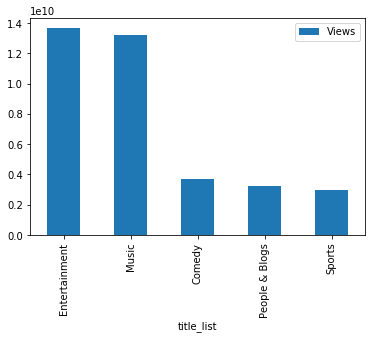

In [14]:
CA_Top=CA_Top5Viewed.plot.bar()

In [15]:
CA_Bottom_5_CategoryID_Views=CA_views_CategoryID_df.sort_values("Views", ascending=True)
CA_Bottom5Viewed=CA_Bottom_5_CategoryID_Views.head(5)
CA_Bottom5Viewed

,Views
title_list,
Movies,17120490
Shows,71549508
Nonprofits & Activism,115601623
Travel & Events,143746952
Autos & Vehicles,200066074


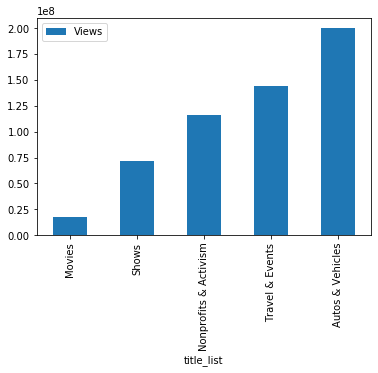

In [16]:
CA_Bottom5Viewed.plot.bar()

In [17]:
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count')
CA_All_CategoryID=CA_df_RN.groupby('title_list').sum()[["Views", 'Likes','Dislikes', 'Comment Count']]
CA_All_CategoryID_df=pd.DataFrame(CA_All_CategoryID)
CA_All_CategoryID_df

,Views,Likes,Dislikes,Comment Count
title_list,,,,
Autos & Vehicles,200066074,4732114,197776,1016188
Comedy,3708438785,196046674,5372515,19638776
Education,531773343,20972402,793448,2968416
Entertainment,13671215509,387245433,25791583,55313036
Film & Animation,2939060844,77802003,3111259,10086573
Gaming,1241532385,51726552,2446882,9664887
Howto & Style,1570846611,51183104,1730520,8342917
Movies,17120490,252905,12280,13979
Music,13179850194,564447530,22098190,52435252


In [18]:
# Find the total Sum of the Views, Likes, Dislikes, Comment Count
CA_Sum_All_CategoryID_df=CA_All_CategoryID_df
CA_Sum_All_CategoryID_df['Total Count']=CA_All_CategoryID_df.sum(axis=1)
CA_Sum_All_CategoryID_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Autos & Vehicles,200066074,4732114,197776,1016188,206012152
Comedy,3708438785,196046674,5372515,19638776,3929496750
Education,531773343,20972402,793448,2968416,556507609
Entertainment,13671215509,387245433,25791583,55313036,14139565561
Film & Animation,2939060844,77802003,3111259,10086573,3030060679
Gaming,1241532385,51726552,2446882,9664887,1305370706
Howto & Style,1570846611,51183104,1730520,8342917,1632103152
Movies,17120490,252905,12280,13979,17399654
Music,13179850194,564447530,22098190,52435252,13818831166


In [19]:
# Sort to find the Top 5
CA_Top_5_CategoryID=CA_Sum_All_CategoryID_df.sort_values("Total Count",ascending=False)
CA_Top_5_CategoryID_df=CA_Top_5_CategoryID.head(5)
CA_Top_5_CategoryID_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Entertainment,13671215509,387245433,25791583,55313036,14139565561
Music,13179850194,564447530,22098190,52435252,13818831166
Comedy,3708438785,196046674,5372515,19638776,3929496750
People & Blogs,3228227926,105388564,9480796,16818201,3359915487
Sports,2997652188,59449419,3286369,7661342,3068049318


In [20]:
#Sort to find the Bottom 5
CA_Bottom_5_CategoryID=CA_Sum_All_CategoryID_df.sort_values("Total Count",ascending=True)
CA_Bottom_5_CategoryID_df=CA_Bottom_5_CategoryID.head(5)
CA_Bottom_5_CategoryID_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Movies,17120490,252905,12280,13979,17399654
Shows,71549508,589263,120436,77243,72336450
Nonprofits & Activism,115601623,10242613,2325807,3222541,131392584
Travel & Events,143746952,3750914,129861,609953,148237680
Autos & Vehicles,200066074,4732114,197776,1016188,206012152


In 20 - 22

We found Top 5 most viewed Categories and the bottom 5 least viewed Categories
We found Top 5 most liked Categories and the top 5 most disliked Categories
(did not do bottom 5 most liked Categories because that generates a zero, since we already have the opposite of likes as a column (dislikes) we used that)


In [22]:
#Top 5 views per category
CA_Cateogry_views=CA_Sum_All_CategoryID_df.sort_values("Views",ascending=False)
#saving as new variable
CA_Cateogry_views_df=CA_Cateogry_views.head(5)
CA_Cateogry_views_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Entertainment,13671215509,387245433,25791583,55313036,14139565561
Music,13179850194,564447530,22098190,52435252,13818831166
Comedy,3708438785,196046674,5372515,19638776,3929496750
People & Blogs,3228227926,105388564,9480796,16818201,3359915487
Sports,2997652188,59449419,3286369,7661342,3068049318


In [24]:
#Bottom 5 views per category
CA_bot_Cateogry_views =CA_Sum_All_CategoryID_df.sort_values("Views")
#saving as new variable
CA_bot_Cateogry_views_df=CA_bot_Cateogry_views.head(5)
CA_bot_Cateogry_views_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Movies,17120490,252905,12280,13979,17399654
Shows,71549508,589263,120436,77243,72336450
Nonprofits & Activism,115601623,10242613,2325807,3222541,131392584
Travel & Events,143746952,3750914,129861,609953,148237680
Autos & Vehicles,200066074,4732114,197776,1016188,206012152


In [25]:
#Top 5 liked per category
CA_Cateogry_likes = CA_Sum_All_CategoryID_df.sort_values("Likes",ascending=False)
#saving as new variable
CA_Cateogry_likes_df=CA_Cateogry_likes.head(5)
CA_Cateogry_likes_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Music,13179850194,564447530,22098190,52435252,13818831166
Entertainment,13671215509,387245433,25791583,55313036,14139565561
Comedy,3708438785,196046674,5372515,19638776,3929496750
People & Blogs,3228227926,105388564,9480796,16818201,3359915487
Film & Animation,2939060844,77802003,3111259,10086573,3030060679


In [26]:
#Top 5 disliked per category
CA_Cateogry_Dislikes = CA_Sum_All_CategoryID_df.sort_values("Dislikes",ascending=False)
#saving as new variable
CA_Cateogry_Dislikes_df=CA_Cateogry_Dislikes.head(5)
CA_Cateogry_Dislikes_df

,Views,Likes,Dislikes,Comment Count,Total Count
title_list,,,,,
Entertainment,13671215509,387245433,25791583,55313036,14139565561
Music,13179850194,564447530,22098190,52435252,13818831166
People & Blogs,3228227926,105388564,9480796,16818201,3359915487
Comedy,3708438785,196046674,5372515,19638776,3929496750
Sports,2997652188,59449419,3286369,7661342,3068049318
